# Support Vector Machine From Scratch

## 1. Imports

In [102]:
import pandas as pd
import numpy as np
from numpy import linalg as LA

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 To ignore all the warnings

In [103]:
import warnings
warnings.filterwarnings('ignore')

## 2.0 Building the classification dataset

In [111]:
# building the dataset
X, y = make_blobs(n_samples=20, 
                  centers=2,
                  cluster_std=0.9, 
                  n_features=2, 
                  random_state=1234)

In [112]:
# y should only have +1 and -1
y[y==0] = -1

## 2.1 Checking out the shape of the Input and Ouput Variables

In [113]:
# shapes of the arrays
print("Input variable shape: ", X.shape)
print("Output variable shape: ", y.shape)

Input variable shape:  (20, 2)
Output variable shape:  (20,)


## 3.0 Visualization of our data

In [114]:
# building a dataframe
data = {}
for i in range(0, X.shape[1]):
    data[f"f{i + 1}"] = X[:, i]
data["class"] = y

df = pd.DataFrame(data = data)

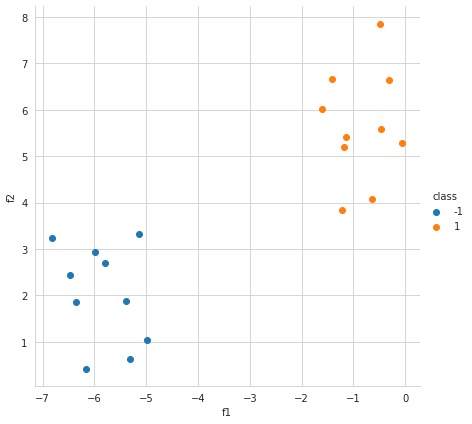

In [115]:
sns.set_style("whitegrid")
sns.FacetGrid(df,
             hue= "class",
             height=6).map(plt.scatter, "f1", "f2").add_legend()
plt.show()

## 3.1 SVM implementation

In [122]:
def SVM(input_vars = None, 
        output_vars =None,
        learning_rate = 0.001,
        C = 1,
        iteration = 500, 
        verbose = True):
    
    w = np.random.normal(loc = 0.0, scale = 0.02, size = input_vars.shape[-1])
    b = np.random.normal(loc = 0.0, scale = 0.02, size = 1)
    
    # building a dataframe
    data = {}
    for i in range(0, input_vars.shape[1]):
        data[f"f{i + 1}"] = input_vars[:, i]
    data["class"] = output_vars
    

    
    
    for _ in range(iteration + 1):
        if verbose and (_ % 100) == 0:
            hinge_loss = np.sum((1 - ((np.dot(input_vars,  w) - b) * output_vars))) + (C * LA.norm(w, ord = 2))
            y_pred = np.sign(np.dot(input_vars, w) - b)
            accuracy = (np.sum(y_pred == y) / y.shape[0]) * 100
            print(f"Iteration : {_}, Hinge Loss: {round(hinge_loss, 2)}, Accuracy: {accuracy}")
            
            
        for index, point in enumerate(input_vars):
            if output_vars[index] * (np.dot(point, w) - b) >= 1:
                dw = 2 * C * w
                db = 0
            else:
                dw = (2 * C * w) - (point * output_vars[index])
                db = output_vars[index]
                
            w -= learning_rate * dw
            b -= learning_rate * db
            
            
    # getting the leftmost x, y value
    leftmost = np.min(input_vars[:, 0])
    # getting the right most x, y value
    rightmost = np.max(input_vars[:, 0])
    # stacking them horizontally
    x_points = np.hstack([leftmost, rightmost])
    y_points = (-w[0] * x_points + b) / w[1]

    df = pd.DataFrame(data = data)
    sns.set_style("whitegrid")
    sns.FacetGrid(df,
                 hue= "class",
                 height=6).map(plt.scatter, "f1", "f2").add_legend()
    sns.lineplot(x_points, y_points, color = "black")
    plt.show()
    
    return w, b

## 3.2 Training the model 

Iteration : 0, Hinge Loss: 19.52, Accuracy: 50.0
Iteration : 100, Hinge Loss: 19.14, Accuracy: 50.0
Iteration : 200, Hinge Loss: 18.76, Accuracy: 50.0
Iteration : 300, Hinge Loss: 18.38, Accuracy: 50.0
Iteration : 400, Hinge Loss: 18.0, Accuracy: 50.0
Iteration : 500, Hinge Loss: 17.62, Accuracy: 50.0
Iteration : 600, Hinge Loss: 17.25, Accuracy: 50.0
Iteration : 700, Hinge Loss: 16.87, Accuracy: 50.0
Iteration : 800, Hinge Loss: 16.49, Accuracy: 50.0
Iteration : 900, Hinge Loss: 16.11, Accuracy: 55.00000000000001
Iteration : 1000, Hinge Loss: 15.73, Accuracy: 65.0
Iteration : 1100, Hinge Loss: 15.35, Accuracy: 70.0
Iteration : 1200, Hinge Loss: 14.97, Accuracy: 70.0
Iteration : 1300, Hinge Loss: 14.59, Accuracy: 75.0
Iteration : 1400, Hinge Loss: 14.21, Accuracy: 75.0
Iteration : 1500, Hinge Loss: 13.83, Accuracy: 85.0
Iteration : 1600, Hinge Loss: 13.45, Accuracy: 90.0
Iteration : 1700, Hinge Loss: 13.07, Accuracy: 90.0
Iteration : 1800, Hinge Loss: 12.69, Accuracy: 95.0
Iteration : 

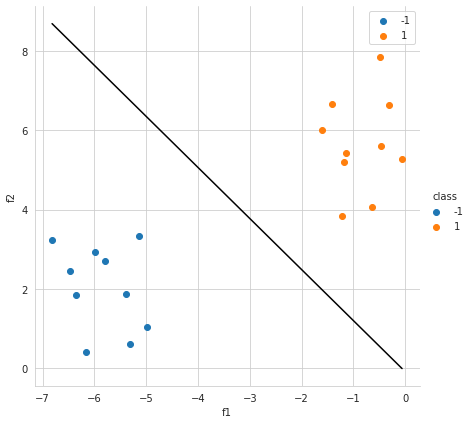

In [125]:
w, b = SVM(input_vars = X, 
        output_vars =y,
        learning_rate = 0.000001,
        C = 0.0003,
        iteration = 6000, 
        verbose = True)

## 3.3 Learned weights and biases

In [126]:
print("Weight:",  w)
print("Bias:", b[0])

Weight: [0.2446671  0.19016581]
Bias: -0.015540158440605493
